# Retificador de meia onda (Carga D/R/L)

In [2]:
from funcoes import *
%run funcoes.py
%matplotlib inline

# - Tensão na carga - # 
Vpk:	 100 
Vm: 	 31.830988618379063 
Vrms: 	 50.000000000000014
# - Corrente na carga - # 
Ipk: 	 0.37365143496280745 
Im: 	 0.10499568920313578 
Irms: 	 0.1771405520850346
# - Corrente no diodo - # 
Idpk: 	 0.35492517618049835 
Idm: 	 0.05100833535540017 
Idrms: 	 0.11485993189084574
# - Potências - # 
Ppk:	 28.093875312816163 
P: 	 6.929789738757556 
S: 	 12.525728560245676
# - Fatores - # 
FP:	 0.5532444444590165 
THD V:	 1.0000010759923332 
THD I:	 1.1000357906459233


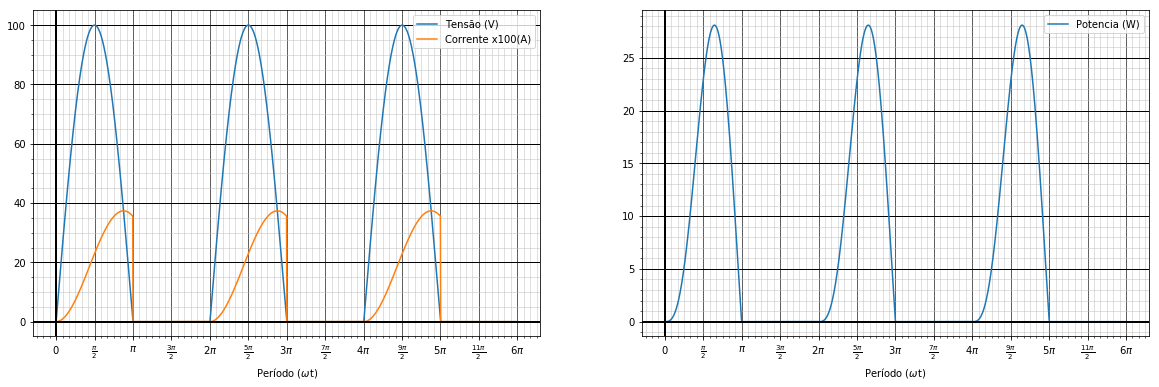

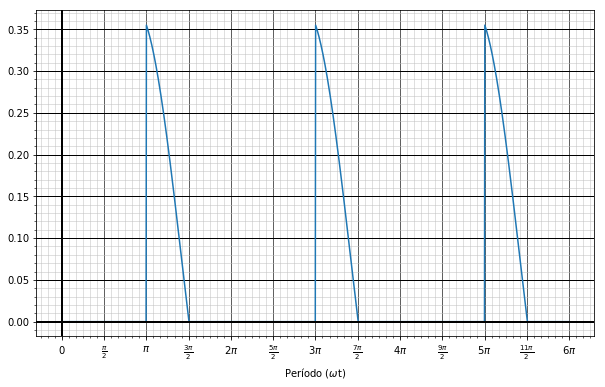

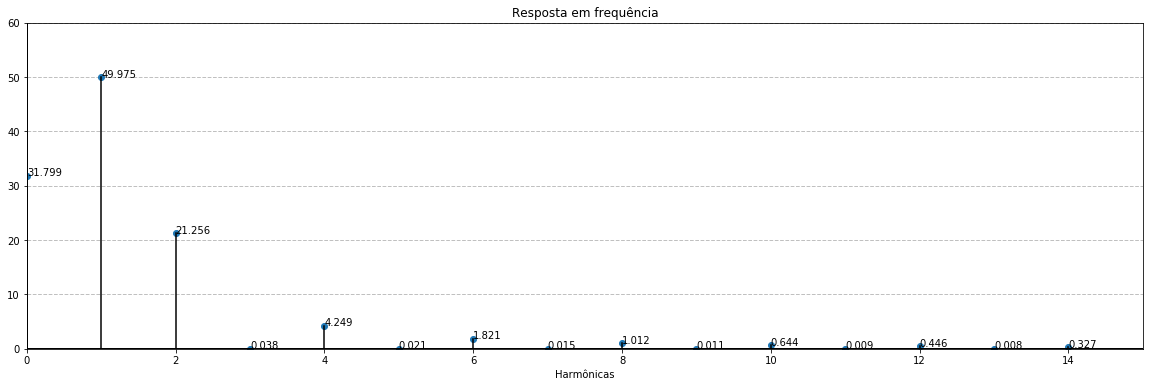

In [3]:
############# RETIFICADOR MEIA ONDA #############
################## CARGA D/R/L ##################

V_pk = 100
Freq = 60
R = 100
L = 1
T = 2*pi
a = 0
b = pi

w = 2*pi*Freq

XL = w * L

XRL = complex(R,XL)

Z = abs(XRL)
teta = cm.phase(XRL) #(r, phi) = polar(z)
tal = L/R

func_ab = f'({V_pk}/{Z})*(sin(x - {teta}) + sin({teta})*exp(-x/({w}*{tal})))'
ab = calculo_ab(func_ab, 1.01*b, 'scipy')
b_d = ab[0]

# Vpk*sen(x)
func_v = f'{V_pk}*sin(x)*( heaviside(x - {a}, 0) - heaviside(x - {b}, 0) + {eps} )'
V_media = calculo_medio(func_v)
V_rms = calculo_rms(func_v)

# (Vpk/Z)*[sen(x - teta) + sen(teta)*exp(-x/(w*tal))]
func_i = func_ab + f'*( heaviside(x - {a}, 0) - heaviside(x - {b}, 0) + {eps} )'
I_media = calculo_medio(func_i)
I_rms = calculo_rms(func_i)
I_pk = calculo_pk(func_i)

# (Vpk/Z)*[sen(x - teta) + sen(teta)*exp(-x/(w*tal))]
func_id = func_ab + f'*( heaviside(x - {b}, 0) - heaviside(x - {b_d}, 0) + {eps} )'
Id_media = calculo_medio(func_id)
Id_rms = calculo_rms(func_id)
Id_pk = calculo_pk(func_id)

func_p = '(' + func_v + ')*(' + func_i + ')'
P = calculo_medio(func_p)
S = I_rms*(V_pk/sqrt(2))
Q = sqrt(S**2 - P**2)
P_pk = calculo_pk(func_p)

FP = P/S
thdV = calculo_thd(func_v, T)
thdI = calculo_thd(func_i, T)

# V_pk/Z    - 0.2563914589565538
#           - 0.37365143496280745
#           - 0.35492517618049835
# V_pk**2/R - 100
#           - 28.093875312816163
print("# - Tensão na carga - #"   , "\nVpk:\t"  , V_pk , "\nVm: \t"  , V_media , "\nVrms: \t" , V_rms)
print("# - Corrente na carga - #" , "\nIpk: \t" , I_pk , "\nIm: \t"  , I_media , "\nIrms: \t" , I_rms)
print("# - Corrente no diodo - #" , "\nIdpk: \t", Id_pk, "\nIdm: \t" , Id_media, "\nIdrms: \t", Id_rms)
print("# - Potências - #"         , "\nPpk:\t"  , P_pk , "\nP: \t"   , P       , "\nS: \t"    , S)
print("# - Fatores - #"           , "\nFP:\t"   , FP   , "\nTHD V:\t", thdV    , "\nTHD I:\t" , thdI)

plot_info(func_v, func_i, xlim=(0, T))
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6), sharey=False, sharex=True)
plot_fx(func_id, "Corrente no diodo", xlim=(0, T), ax=ax1)
fig, ax2 = plt.subplots(1, 1, figsize=(20, 6), sharey=True, sharex=True)
plot_fft(func_v, ax2, T=2*np.pi, n_harmonicas = 15)